In [ ]:
#Group 11 Work 
#Air -Quality 
# we analyzed PM2.5 trends 
#  we  Used NumPy to create random temperature readings and  compute average.
# we checked for missing PM2.5 data using pandas
# visualize pollutant using matplotlib
# compare pollution levels by region using grouby() and bar charts



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
#Reading file
df = pd.read_csv(
    "Measurement_summary.csv"
)
df.head()

,Measurement date,Station code,Address,Latitude,Longitude,SO2,NO2,O3,CO,PM10,PM2.5
0,2017-01-01 00:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.004,0.059,0.002,1.2,73.0,57.0
1,2017-01-01 01:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.004,0.058,0.002,1.2,71.0,59.0
2,2017-01-01 02:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.004,0.056,0.002,1.2,70.0,59.0
3,2017-01-01 03:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.004,0.056,0.002,1.2,70.0,58.0
4,2017-01-01 04:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.003,0.051,0.002,1.2,69.0,61.0


In [ ]:

# Check missing values
df['PM2.5'].isna().sum()


np.int64(0)

In [ ]:
# handling the missing values
df['PM2.5'] = df['PM2.5'].fillna(df['PM2.5'].mean())



In [ ]:
#Summary of PM2.5
df['PM2.5'].describe()


count    647511.000000
mean         25.411995
std          43.924595
min          -1.000000
25%          11.000000
50%          19.000000
75%          31.000000
max        6256.000000
Name: PM2.5, dtype: float64

In [ ]:
# Convert date column to datetime
df['Measurement date'] = pd.to_datetime(df['Measurement date'])

In [ ]:
df['PM2.5'].head(10)

0    57.0
1    59.0
2    59.0
3    58.0
4    61.0
5    61.0
6    57.0
7    60.0
8    60.0
9    63.0
Name: PM2.5, dtype: float64

In [ ]:
#group by measurement date and finding their mean

daily_pm25 = df.groupby(df['Measurement date'].dt.date)['PM2.5'].mean()
daily_pm25.head()


Measurement date
2017-01-01    56.773333
2017-01-02    77.838333
2017-01-03    51.533333
2017-01-04    34.533333
2017-01-05    22.168333
Name: PM2.5, dtype: float64

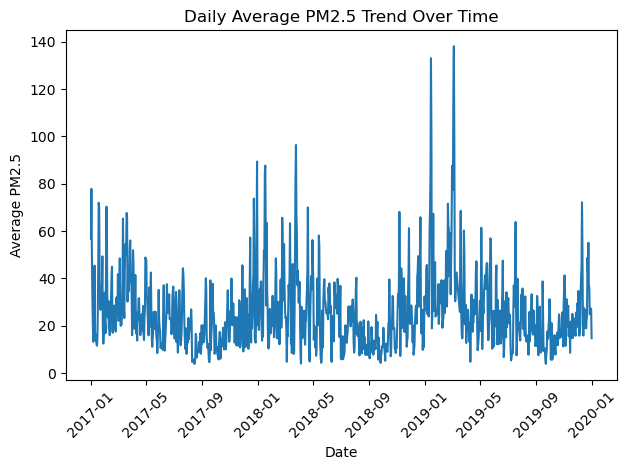

In [ ]:
# ploting the daily avarage PM2.5 trend over time

plt.figure()

plt.plot(daily_pm25.index, daily_pm25.values)

plt.title("Daily Average PM2.5 Trend Over Time")
plt.xlabel("Date")
plt.ylabel("Average PM2.5")

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


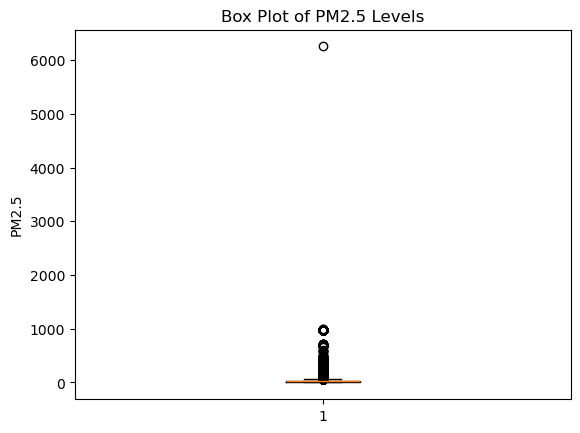

In [ ]:
# checking outliers in PM2.5 trends
import matplotlib.pyplot as plt

plt.figure()
plt.boxplot(df['PM2.5'].dropna())
plt.title("Box Plot of PM2.5 Levels")
plt.ylabel("PM2.5")
plt.show()


In [ ]:


# Create random temperature readings
temperatures = np.random.uniform(low=15, high=35, size=10)

# Compute average temperature
average_temp = np.mean(temperatures)

temperatures, average_temp


(array([22.92242291, 31.01217656, 34.07290172, 34.3590436 , 18.90721515,
        31.47802727, 28.33617814, 25.09412681, 20.70930458, 15.62454452]),
 np.float64(26.2515941273843))

In [ ]:
# Identify missing values
df[df['PM2.5'].isna()]

# Fill missing PM2.5 values with median
df['PM2.5'] = df['PM2.5'].fillna(df['PM2.5'].median())


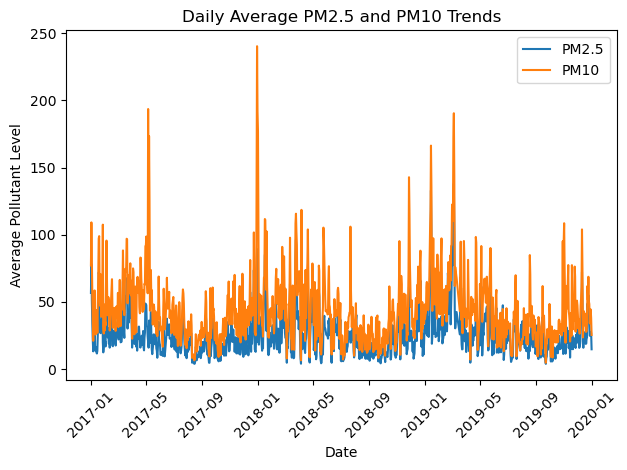

In [ ]:
# ploting daily average PM2.5 and PM 10 Trends
plt.figure()

# Aggregate to daily averages
daily = df.groupby(df['Measurement date'].dt.date)[['PM2.5', 'PM10']].mean()

plt.plot(daily.index, daily['PM2.5'], label='PM2.5')
plt.plot(daily.index, daily['PM10'], label='PM10')

plt.legend()
plt.xlabel("Date")
plt.ylabel("Average Pollutant Level")
plt.title("Daily Average PM2.5 and PM10 Trends")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



In [ ]:
# compare pollutin  levels by region using grouby()
region_pm25 = df.groupby('Station code')['PM2.5'].mean()
region_pm25.head()



Station code
101    22.850454
102    22.867169
103    23.670437
104    24.890639
105    22.845346
Name: PM2.5, dtype: float64

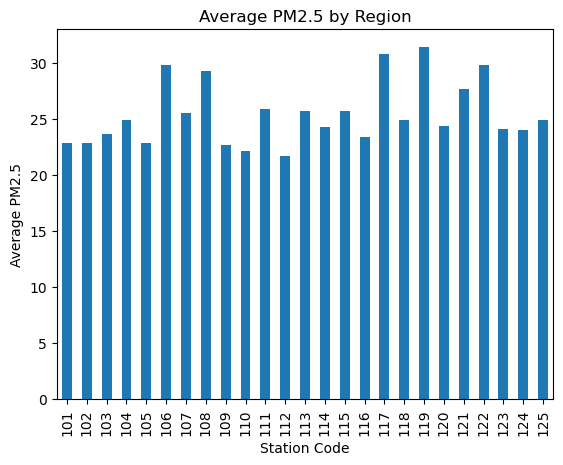

In [ ]:
# visualizing pollutio levels by region using bar chart
plt.figure()
region_pm25.plot(kind='bar', title='Average PM2.5 by Region')
plt.xlabel("Station Code")
plt.ylabel("Average PM2.5")
plt.show()
